In [1]:
from util import setup_notebook
setup_notebook()
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
rnd = pd.read_csv('../output/neuland@jade4j/baseline/jade4j@recently-failed.csv')
rnd['red'] = rnd.failures + rnd.errors
rnd = rnd[rnd['travisJobId'].isin([95531958])]
rnd.head()

,travisJobId,testName,index,duration,count,failures,errors,skipped,red
3661,95531958,de.neuland.jade4j.compiler.OriginalJade2015051...,0,1.481,22,11,11,0,22
3662,95531958,de.neuland.jade4j.compiler.IssuesTest,1,0.158,23,0,0,0,0
3663,95531958,de.neuland.jade4j.compiler.CompilerTest,2,0.648,71,0,0,2,0
3664,95531958,de.neuland.jade4j.exceptions.JadeExceptionTest,3,0.037,2,0,0,0,0
3665,95531958,de.neuland.jade4j.compiler.CompilerIndentation...,4,0.000,1,0,0,0,0


In [3]:
opt = pd.read_csv('../output/neuland@jade4j/baseline/jade4j@optimal-failure.csv')
opt['red'] = opt.failures + opt.errors
opt = opt[opt['travisJobId'].isin([95531958])]
opt.head()

,travisJobId,testName,index,duration,count,failures,errors,skipped,red
3292,95531958,de.neuland.jade4j.compiler.OriginalJade2015051...,0,1.481,22,11,11,0,22
3293,95531958,de.neuland.jade4j.util.CharacterParserTest,1,0.011,6,0,0,0,0
3294,95531958,de.neuland.jade4j.util.ArgumentSplitterTest,2,0.000,4,0,0,0,0
3295,95531958,de.neuland.jade4j.util.JadeEscapeTest,3,0.000,1,0,0,0,0
3296,95531958,de.neuland.jade4j.model.JadeModelTest,4,0.000,2,0,0,0,0


In [4]:
from testmining.apfd import apfd_plot, apfd

In [5]:
apfd_plot(rnd).head()

,executed,red
0,0.000000,0.0
3661,0.070064,1.0
3662,0.143312,1.0
3663,0.369427,1.0
3664,0.375796,1.0


In [6]:
apfd_plot(opt).head()

,executed,red
0,0.000000,0.0
3292,0.070064,1.0
3293,0.089172,1.0
3294,0.101911,1.0
3295,0.105096,1.0


In [7]:
apfd(apfd_plot(rnd)), apfd(apfd_plot(opt))

(0.964968152866242, 0.9649681528662419)

In [8]:
import altair as alt

In [9]:
rndp = pd.concat([
    pd.DataFrame({'executed': [0], 'red': [0]}),
    apfd_plot(rnd),
])

optp = pd.concat([
    pd.DataFrame({'executed': [0], 'red': [0]}),
    apfd_plot(opt),
])

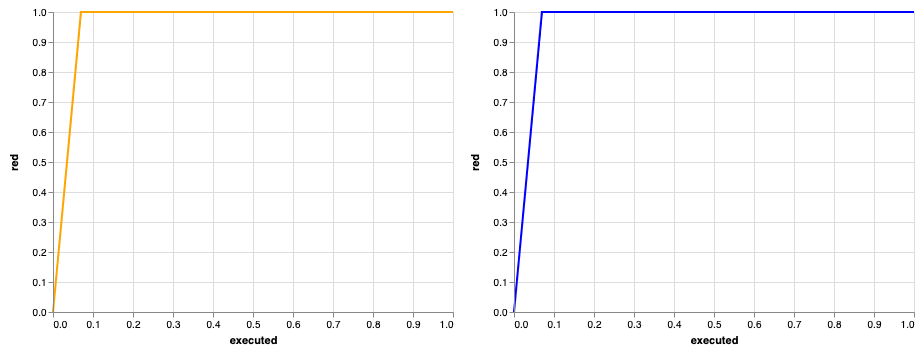

In [10]:
rnd_chart = alt.Chart(rndp).mark_line().encode(x='executed', y='red', color=alt.value('orange'))
opt_chart = alt.Chart(optp).mark_line().encode(x='executed', y='red', color=alt.value('blue'))
rnd_chart | opt_chart

In [11]:
apfd(rndp), apfd(optp)

(0.964968152866242, 0.964968152866242)

In [13]:
pd.Series([0]).append(rnd['count'].cumsum())

0         0
3661     22
3662     45
3663    116
3664    118
3665    119
3666    148
3667    149
3668    151
3669    152
3670    153
3671    154
3672    155
3673    156
3674    157
3675    160
3676    161
3677    162
3678    163
3679    164
3680    165
3681    168
3682    169
3683    170
3684    171
3685    172
3686    173
3687    174
3688    178
3689    180
3690    181
3691    187
3692    191
3693    192
3694    194
3695    199
3696    200
3697    201
3698    207
3699    208
3700    209
3701    212
3702    312
3703    313
3704    314
dtype: int64